In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

In [10]:
class paths:
    TRAIN_CSV = "./train.csv"
    TRAIN_EEGS = "./train_eegs/"
    TRAIN_SPECTOGRAMS = "./train_spectrograms/"
    TRAIN_CLEAN_EEGS = "./cleaned_train_eegs/"

EEG_LABELS = ['Fp1', 'F3', 'C3', 'P3', 'F7', 'T3', 'T5', 'O1', 'Fz', 'Cz', 
              'Pz', 'Fp2', 'F4', 'C4', 'P4', 'F8', 'T4', 'T6', 'O2', 'EKG']

In [3]:
df = pd.read_csv(paths.TRAIN_CSV)
label_cols = df.columns[-6:]
print(f"Train dataframe shape is: {df.shape}")
print(f"Labels: {list(label_cols)}")
df.head()
number_experts = df[label_cols].sum(axis = 1)
for label in label_cols:
    df[label] = df[label] / number_experts
display(df)

Train dataframe shape is: (106800, 15)
Labels: ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']


,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,1.0,0.0,0.0,0.0,0.0,0.0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,1.0,0.0,0.0,0.0,0.0,0.0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,1.0,0.0,0.0,0.0,0.0,0.0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,1.0,0.0,0.0,0.0,0.0,0.0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106795,351917269,6,12.0,2147388374,6,12.0,4195677307,10351,LRDA,0.0,0.0,0.0,1.0,0.0,0.0
106796,351917269,7,14.0,2147388374,7,14.0,290896675,10351,LRDA,0.0,0.0,0.0,1.0,0.0,0.0
106797,351917269,8,16.0,2147388374,8,16.0,461435451,10351,LRDA,0.0,0.0,0.0,1.0,0.0,0.0
106798,351917269,9,18.0,2147388374,9,18.0,3786213131,10351,LRDA,0.0,0.0,0.0,1.0,0.0,0.0


In [4]:
grda = df.loc[df['grda_vote']==1]

In [5]:
for i, idx in enumerate(grda.index):
    if i > 0: break
    row = grda.loc[idx]
    spec = pd.read_parquet(paths.TRAIN_SPECTOGRAMS + str(row.spectrogram_id) + '.parquet')
    spec_offset = int(row.spectrogram_label_offset_seconds)
    spec= spec.loc[(spec.time>=spec_offset)&(spec.time<spec_offset+600)]
    display(spec)

,time,LL_0.59,LL_0.78,LL_0.98,LL_1.17,LL_1.37,LL_1.56,LL_1.76,LL_1.95,LL_2.15,...,RP_18.16,RP_18.36,RP_18.55,RP_18.75,RP_18.95,RP_19.14,RP_19.34,RP_19.53,RP_19.73,RP_19.92
0,1,20.410000,28.250000,27.660000,25.639999,24.850000,14.380000,11.540000,6.980000,4.64,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
1,3,8.240000,26.120001,43.540001,37.660000,42.660000,32.279999,11.370000,6.470000,6.33,...,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
2,5,31.150000,33.580002,50.360001,47.759998,34.330002,27.209999,16.990000,5.730000,3.84,...,0.02,0.01,0.01,0.02,0.01,0.01,0.01,0.02,0.01,0.01
3,7,22.240000,29.620001,33.470001,23.889999,14.970000,16.549999,11.010000,7.220000,7.79,...,0.02,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.01
4,9,19.799999,27.610001,28.590000,34.139999,17.389999,20.559999,13.950000,10.050000,7.16,...,0.01,0.01,0.01,0.02,0.01,0.01,0.01,0.02,0.03,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,591,34.160000,37.549999,36.700001,30.260000,17.510000,13.470000,11.790000,8.600000,4.37,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
296,593,39.360001,52.419998,49.130001,48.209999,27.730000,7.530000,9.210000,6.870000,6.23,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
297,595,31.430000,35.540001,45.209999,36.009998,33.349998,23.459999,24.370001,22.540001,10.91,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00
298,597,27.590000,37.400002,42.740002,31.920000,36.470001,34.330002,22.510000,20.850000,12.06,...,0.01,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01


In [8]:
NAMES = ['LL','LP','RP','RR']
FEATS = [['Fp1','F7','T3','T5','O1'],
         ['Fp1','F3','C3','P3','O1'],
         ['Fp2','F8','T4','T6','O2'],
         ['Fp2','F4','C4','P4','O2']]
dir_path = './train_eeg_spectrograms/'

In [111]:
import librosa
def spectrogram_from_clean_eeg(numpy_path):

    # LOAD MIDDLE 50 SECONDS OF EEG SERIES
    eeg = pd.DataFrame(np.load(numpy_path))
    eeg.columns = EEG_LABELS
    middle = (len(eeg)-1000)//2
    eeg = eeg.iloc[middle:middle+1000]
    
    # VARIABLE TO HOLD SPECTROGRAM
    img = np.zeros((64,320,4),dtype='float32')
    
    for k in range(4):
        for COL in FEATS[k]:

            x = eeg[COL].values
            m = np.nanmean(x)
            if np.isnan(x).mean()<1: x = np.nan_to_num(x,nan=m)
            else: x[:] = 0

            # RAW SPECTROGRAM
            mel_spec = librosa.feature.melspectrogram(y=x, sr=200, hop_length=len(x)//256, 
                  n_fft=512, n_mels=64, fmin=0, fmax=20, win_length=128)

            # LOG TRANSFORM
            width = (mel_spec.shape[1]//32)*32
            mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max).astype(np.float32)[:,:width]

            # STANDARDIZE TO 0 TO 1
            mel_spec_db = (mel_spec_db + 50)/50
            img[:,:,k] += mel_spec_db
     
        # AVERAGE
        img[:,:,k] /= 5.0

        plt.subplot(2,2,k+1)
        plt.imshow(img[:,:,k],aspect='auto',origin='lower')
        plt.title(NAMES[k])

    plt.show()  
    return img

grda


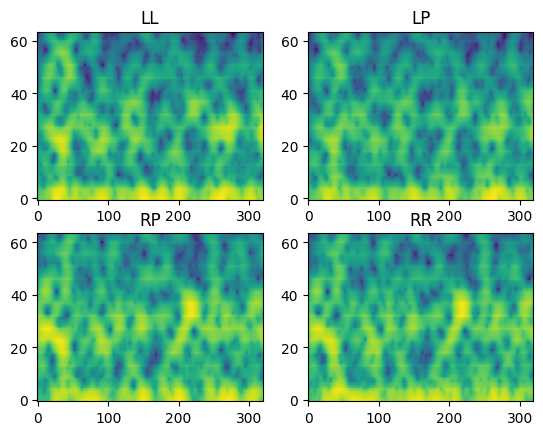

lrda


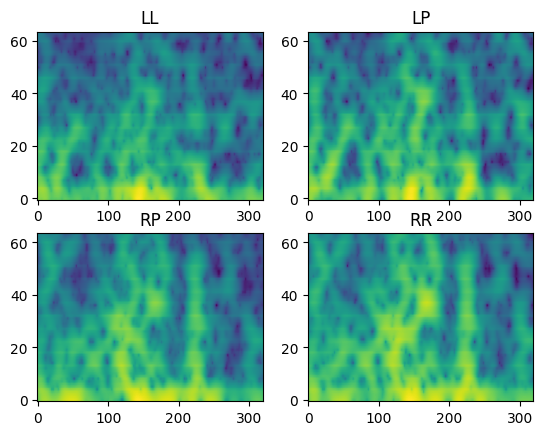

lpd


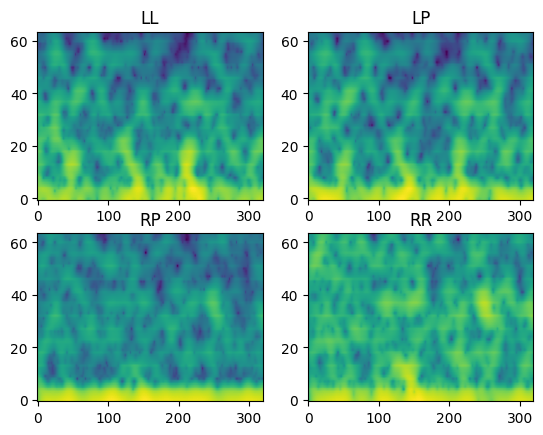

gpd


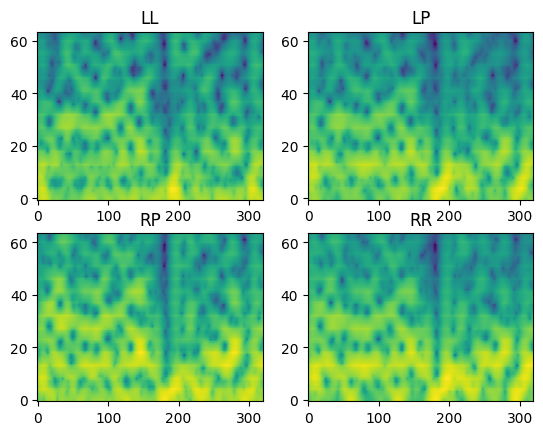

In [116]:
for name in ['grda', 'lrda', 'lpd', 'gpd']:
    print(name)
    sure_df = df.loc[df[f'{name}_vote'] == 1]
    id = sure_df.loc[sure_df.index[0],'eeg_id']
    np_path = paths.TRAIN_CLEAN_EEGS + str(id) + '.npy'
    spectro = spectrogram_from_clean_eeg(np_path)

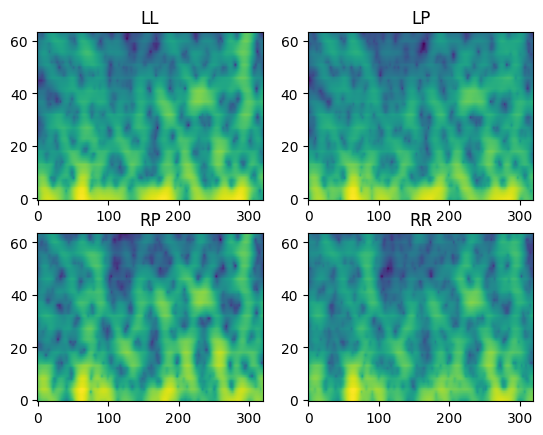

0.1847963
0.9579272


array([[[0.7387031 , 0.6569813 , 0.7155045 , 0.6890336 ],
        [0.7627827 , 0.68554026, 0.7332663 , 0.71219087],
        [0.7838949 , 0.7126663 , 0.7475365 , 0.73188794],
        ...,
        [0.6264536 , 0.70064086, 0.8208478 , 0.81846684],
        [0.6164905 , 0.6918889 , 0.8137592 , 0.8166258 ],
        [0.60797805, 0.68274534, 0.80535185, 0.81334955]],

       [[0.7398021 , 0.67659104, 0.7329489 , 0.7020281 ],
        [0.7632816 , 0.7015812 , 0.7497717 , 0.7219192 ],
        [0.7838833 , 0.7247232 , 0.7641369 , 0.7390016 ],
        ...,
        [0.63251173, 0.6985647 , 0.81815463, 0.8133129 ],
        [0.63450164, 0.6970524 , 0.8147324 , 0.81246805],
        [0.6382181 , 0.69593275, 0.81097925, 0.8104296 ]],

       [[0.7408377 , 0.6886238 , 0.7459462 , 0.711815  ],
        [0.7636328 , 0.7120758 , 0.76246226, 0.72992456],
        [0.7836397 , 0.7333896 , 0.7766925 , 0.7452687 ],
        ...,
        [0.62972844, 0.69095767, 0.81134814, 0.8061283 ],
        [0.6427042 , 0.696109

In [107]:
id = '568657'
np_path = paths.TRAIN_CLEAN_EEGS + id + '.npy'
spectro = spectrogram_from_clean_eeg(np_path)
print(np.min(spectro))
print(np.max(spectro))
display(spectro)